In [1]:
import numpy as np
from StochasticProcess import StochasticProcess, BlackScholesProcess
from RegressionBasis import *
from Option import *
from LongstaffSchwartz import LongstaffSchwartz
import time
import matplotlib.pyplot as plt
from scipy.stats import t

from scipy import sqrt
import scipy

from statistics import variance, mean 

In [18]:
dim  = 3
S_0 = np.array([np.linspace(0, 120, 100)  for i in range(dim)]).T


In [42]:
price = 1*np.random.random(size=(100))

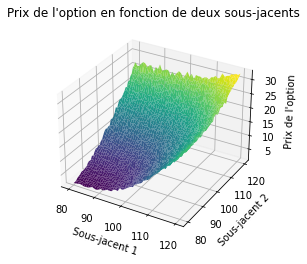

In [34]:


# Paramètres
dim = 2
r = np.array([0.05, 0.06])
vol = np.array([0.1, 0.2])
corr = np.array([[1.0, 0.5], [0.5, 1.0]])
mu = np.array([0.06, 0.08])
S0 = np.array([100, 100])
N = 1000
m = 50
T = 1
degree = 4
K=105

# Calcul des prix d'options en fonction des sous-jacents
S1_range = np.linspace(80, 120, 50)
S2_range = np.linspace(80, 120, 50)
prices = np.zeros((len(S1_range), len(S2_range)))

for i, S1 in enumerate(S1_range):
    for j, S2 in enumerate(S2_range):
        process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)
        S0 = np.array([S1, S2])
        option = MaxCallOption(K, T, S0)
        basis = PolynomialBasis(degree)
        ls = LongstaffSchwartz(option, basis, N)
        price = ls.price(option, process, m)
        prices[i, j] = price

# Tracé du graphique
X, Y = np.meshgrid(S1_range, S2_range)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, prices.T, cmap='viridis')
ax.set_xlabel('Sous-jacent 1')
ax.set_ylabel('Sous-jacent 2')
ax.set_zlabel('Prix de l\'option')
ax.set_title('Prix de l\'option en fonction de deux sous-jacents')
plt.show()


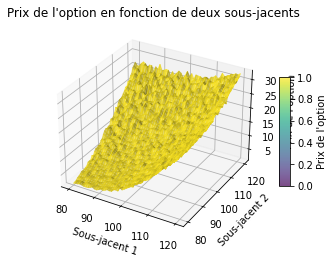

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Utilisez plot_surface au lieu de scatter pour afficher la surface
surface = ax.plot_surface(X, Y, prices.T
                          , facecolors=plt.cm.viridis(prices), rstride=1, cstride=1, alpha=0.7)
cbar = fig.colorbar(surface, shrink=0.5, aspect=10)
cbar.set_label("Prix de l'option")

ax.set_xlabel('Sous-jacent 1')
ax.set_ylabel('Sous-jacent 2')
ax.set_zlabel("Prix de l'option")
ax.set_title("Prix de l'option en fonction de deux sous-jacents")

# Ajoutez la possibilité de tourner le graphique avec la souris
ax.mouse_init()

plt.show()







In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ... (paramètres et calcul des prix d'options comme précédemment) ...



# Utilisation de plot_surface pour afficher la surface
surface = ax.plot_surface(X, Y, prices.T, cmap=plt.cm.viridis, rstride=1, cstride=1, alpha=0.7)
cbar = fig.colorbar(surface, shrink=0.5, aspect=10)
cbar.set_label('Prix de l\'option')

ax.set_xlabel('Sous-jacent 1')
ax.set_ylabel('Sous-jacent 2')
ax.set_zlabel('Prix de l\'option')
ax.set_title('Prix de l\'option en fonction de deux sous-jacents')

# Ajout de l'interaction pour tourner le graphique
ax.mouse_init()

plt.show()


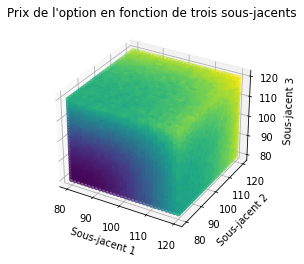

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paramètres
dim = 3
r = np.array([0.05, 0.06, 0.04])
vol = np.array([0.1, 0.2, 0.15])
corr = np.array([
    [1.0, 0.2, 0.4],
    [0.2, 1.0, 0.5],
    [0.4, 0.5, 1.0]
])
mu = np.array([0.06, 0.08, 0.07])
S0 = np.array([100, 100, 100])
N = 1000
m = 50
T = 1
degree = 4
K=105

# Calcul des prix d'options en fonction des sous-jacents
S1_range = np.linspace(80, 120, 30)
S2_range = np.linspace(80, 120, 30)
S3_range = np.linspace(80, 120, 30)
prices = np.zeros((len(S1_range), len(S2_range), len(S3_range)))

for i, S1 in enumerate(S1_range):
    for j, S2 in enumerate(S2_range):
        for k, S3 in enumerate(S3_range):
            process = BlackScholesProcess(dim=dim, r=r, vol=vol, corr=corr, mu=mu)
            S0 = np.array([S1, S2, S3])
            option = MaxCallOption(K, T, S0)
            basis = PolynomialBasis(degree)
            ls = LongstaffSchwartz(option, basis, N)
            price = ls.price(option, process, m)
            prices[i, j, k] = price

# Tracé du graphique en 3D
X, Y, Z = np.meshgrid(S1_range, S2_range, S3_range, indexing='ij')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=prices, cmap='viridis')
ax.set_xlabel('Sous-jacent 1')
ax.set_ylabel('Sous-jacent 2')
ax.set_zlabel('Sous-jacent 3')
ax.set_title('Prix de l\'option en fonction de trois sous-jacents')
plt.show()


In [2]:
def binomial_tree_american_put(S, K, r, T, N):
    dt = T / N
    u = np.exp(r * dt)
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    prices = np.zeros((N+1, N+1))

    # Initialize option values at maturity
    for i in range(N+1):
        prices[N, i] = max(K - S * (u ** (N - i)) * (d ** i), 0)

    # Calculate option values at earlier time steps
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            early_exercise = max(K - S * (u ** (i - j)) * (d ** j), 0)
            continuation_value = np.exp(-r * dt) * (p * prices[i+1, j] + (1 - p) * prices[i+1, j+1])
            prices[i, j] = max(early_exercise, continuation_value)

    return prices[0, 0]

# Example usage
S = 100
K = 110
r = 0.05
T = 1
N = 100

price = binomial_tree_american_put(S, K, r, T, N)
print("American Put Option Price:", price)


American Put Option Price: 10.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3684\2382762488.py:39: MatplotlibDeprecationWarning: Additional positional arguments to plot_surface() are deprecated since 3.4 and support for them will be removed two minor releases later.
  ax.plot_surface(X, Y, Z, V[0, :, :, :])


ValueError: Argument Z must be 2-dimensional.

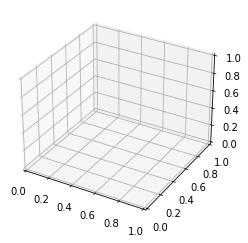

In [4]:


# Paramètres
T = 1.0  # Période d'option
N = 100  # Nombre d'intervalles de temps
S_max = 200  # Valeur maximale de l'actif sous-jacent
M = 100  # Nombre d'intervalles spatiaux

# Pas de temps et spatial
dt = T / N
dS = S_max / M

# Coefficients de dérive, volatilité et diffusion (simulés)
alpha = 0.1
beta = 0.2
gamma = 0.01

# Initialisation des valeurs d'option
V = np.zeros((N + 1, M + 1, M + 1, M + 1))

# Définition du prix d'exercice K
K = 105

# Conditions aux limites à l'échéance
V[N, :, :, :] = np.maximum(
    np.meshgrid(np.arange(M + 1) * dS - K, np.arange(M + 1) * dS - K, np.arange(M + 1) * dS - K, indexing='ij')[0],
    0)

# Propagation dans le temps en utilisant le schéma d'Euler explicite
for n in range(N - 1, -1, -1):
    for i in range(1, M):
        for j in range(1, M):
            for k in range(1, M):
                V[n, i, j, k] = V[n + 1, i, j, k] + dt * (
                    alpha * V[n + 1, i + 1, j, k] + beta * V[n + 1, i, j, k] + gamma * V[n + 1, i - 1, j, k])

# Plot des résultats
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = np.meshgrid(np.arange(M + 1) * dS, np.arange(M + 1) * dS, np.arange(M + 1) * dS, indexing='ij')
ax.plot_surface(X, Y, Z, V[0, :, :, :])
ax.set_xlabel("Actif sous-jacent 1")
ax.set_ylabel("Actif sous-jacent 2")
ax.set_zlabel("Actif sous-jacent 3")
ax.set_title("Pricing d'une option MaxCall à 3 dimensions (Euler explicite)")
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3684\1552179018.py:5: MatplotlibDeprecationWarning: Additional positional arguments to plot_surface() are deprecated since 3.4 and support for them will be removed two minor releases later.
  ax.plot_surface(X, Y, Z, V[0, :, :, :])


ValueError: Argument Z must be 2-dimensional.

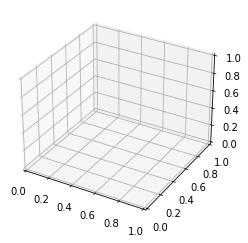

In [6]:
# Plot des résultats
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = np.meshgrid(np.arange(M + 1) * dS, np.arange(M + 1) * dS, np.arange(M + 1) * dS, indexing='ij')
ax.plot_surface(X, Y, Z, V[0, :, :, :])
ax.set_xlabel("Actif sous-jacent 1")
ax.set_ylabel("Actif sous-jacent 2")
ax.set_zlabel("Actif sous-jacent 3")
ax.set_title("Pricing d'une option MaxCall à 3 dimensions (Euler explicite)")
plt.show()